In [1]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
df = pd.read_csv("Churn_Modelling.csv", encoding='ISO-8859-1')


In [2]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [4]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
all_data_types = df.dtypes
print(all_data_types)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
# Convert 'Gender' to a categorical variable
df['Gender'] = df['Gender'].astype('category')

# Convert 'Geography' to a categorical variable
df['Geography'] = df['Geography'].astype('category')

In [7]:
# Get the data types of all the columns in the DataFrame
all_data_types = df.dtypes
print(all_data_types)


CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object


In [8]:
summary_numerical = df.describe()

In [9]:
summary_numerical

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
summary_categorical = df.describe(include=['category'])


In [11]:
summary_categorical

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


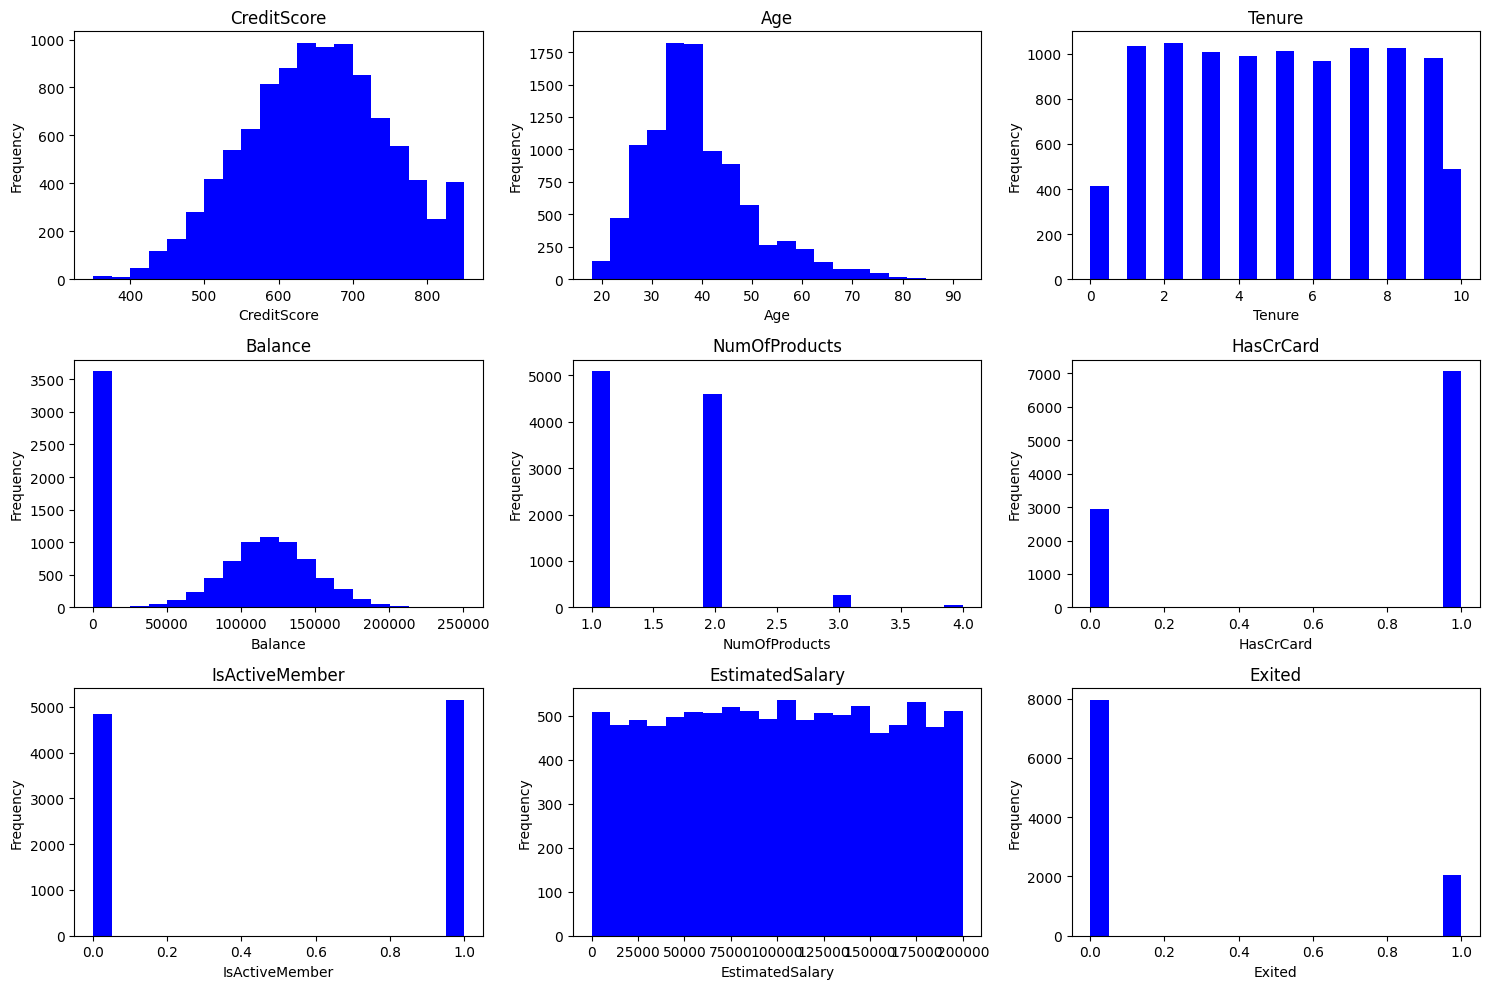

In [12]:
import matplotlib.pyplot as plt

# Define the number of subplots based on the number of features you want to plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10)) # Adjust the size as needed

# Flatten the array of axes to make it easier to iterate over
axes = axes.flatten()

# List of columns to plot (excluding 'RowNumber', 'CustomerId', 'Surname')
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Iterate over each feature and create a histogram
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    df[col].plot(kind='hist', ax=ax, bins=20, color='blue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any remaining empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjusts plot parameters to give a tidy layout
plt.show()


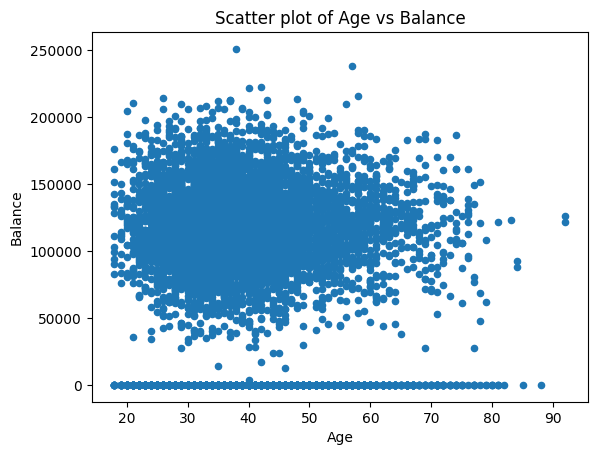

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for 'Age' and 'Balance'
df.plot(kind='scatter', x='Age', y='Balance')
plt.xlabel('Age')  # Adding x-axis label for clarity
plt.ylabel('Balance')  # Adding y-axis label for clarity
plt.title('Scatter plot of Age vs Balance')  # Adding a title for clarity
plt.show()


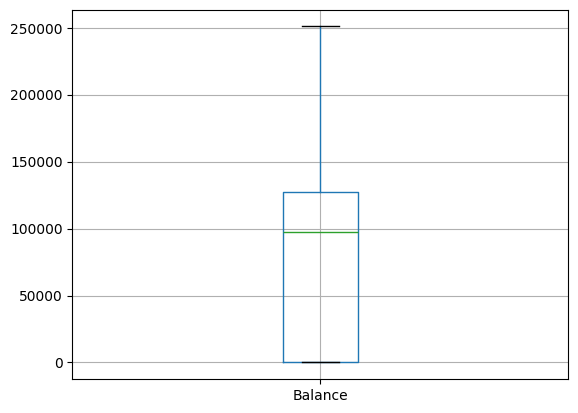

In [14]:
# Boxplot example for 'Balance'
df.boxplot(column='Balance')
plt.show()

# Alternatively, you can use Z-score or IQR for detection and removal
# from scipy import stats
# df[(np.abs(stats.zscore(df['Balance'])) < 3)]  # Filter out where Z-score is less than 3


In [15]:
# Count the number of 1's and 0's in the 'Exited' column
exited_counts = df['Exited'].value_counts()
print(exited_counts)


Exited
0    7963
1    2037
Name: count, dtype: int64


In [16]:
unique_genders = df['Gender'].unique()
print(unique_genders)


['Female', 'Male']
Categories (2, object): ['Female', 'Male']


In [17]:
unique_Geography = df['Geography'].unique()
print(unique_Geography)


['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']


In [18]:
# Importing necessary library
from sklearn.preprocessing import OneHotEncoder

# Creating a OneHotEncoder instance
encoder = OneHotEncoder()

# Encoding 'Gender' column
gender_encoded = encoder.fit_transform(df[['Gender']]).toarray()

# Encoding 'Geography' column
geography_encoded = encoder.fit_transform(df[['Geography']]).toarray()

# Merging encoded arrays with the original DataFrame
import numpy as np
df_encoded = df.drop(columns=['Gender', 'Geography'])
df_encoded = pd.concat([df_encoded, pd.DataFrame(gender_encoded, columns=['Female', 'Male'])], axis=1)
df_encoded = pd.concat([df_encoded, pd.DataFrame(geography_encoded, columns=['France', 'Germany', 'Spain'])], axis=1)

# Displaying the encoded DataFrame
print(df_encoded.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Female  Male  France  Germany  \
0               1        101348.88       1     1.0   0.0     1.0      0.0   
1               1        112542.58       0     1.0   0.0     0.0      0.0   
2               0        113931.57       1     1.0   0.0     1.0      0.0   
3               0         93826.63       0     1.0   0.0     1.0      0.0   
4               1         79084.10       0     1.0   0.0     0.0      0.0   

   Spain  
0    0.0  
1    1.0  
2    0.0  
3    0.0  
4    1.0  


In [19]:
# Get the data types of all the columns in the DataFrame
all_data_types = df_encoded.dtypes
print(all_data_types)


CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Female             float64
Male               float64
France             float64
Germany            float64
Spain              float64
dtype: object


In [20]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,1.0,1.0,0.0,0.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,1.0,1.0,0.0,0.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,1.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,1.0,0.0


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your already encoded DataFrame with all your data.

# If 'Exited' is your target variable, separate it from the feature variables
X = df_encoded.drop('Exited', axis=1)  # This will be the features
y = df_encoded['Exited']  # This will be the target

# Now split the data into training and test sets
# The test_size=0.2 argument means that 20% of the data will be used for the test set, and 80% for training
# random_state is set to a fixed number to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are now your training data
# X_test and y_test are your test data


In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
y_train_smote

0        0
1        0
2        1
3        1
4        1
        ..
12707    1
12708    1
12709    1
12710    1
12711    1
Name: Exited, Length: 12712, dtype: int64

In [24]:
# Assuming y_train is a pandas DataFrame or Series
column_names = y_train_smote.columns if isinstance(y_train_smote, pd.DataFrame) else [y_train_smote.name]
print("Column names in y_train_smote:", column_names)


Column names in y_train_smote: ['Exited']


In [25]:
X_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,686,32,6,0.000000,2,1,1,179093.260000,0.000000,1.000000,1.000000,0.000000,0.00000
1,632,42,4,119624.600000,2,1,1,195978.860000,0.000000,1.000000,0.000000,1.000000,0.00000
2,559,24,3,114739.920000,1,1,0,85891.020000,0.000000,1.000000,0.000000,0.000000,1.00000
3,561,27,9,135637.000000,1,1,0,153080.400000,1.000000,0.000000,1.000000,0.000000,0.00000
4,517,56,9,142147.320000,1,0,0,39488.040000,0.000000,1.000000,1.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12707,747,47,6,133415.111263,1,0,1,3409.082623,0.614641,0.385359,0.385359,0.614641,0.00000
12708,730,43,8,0.000000,1,0,0,199220.081437,0.047039,0.952961,0.000000,0.000000,1.00000
12709,769,32,2,0.000000,1,1,0,193872.703755,0.120890,0.879110,0.879110,0.000000,0.12089
12710,648,56,7,110599.540192,1,0,0,134673.548272,0.187243,0.812757,0.000000,1.000000,0.00000


In [26]:
y_train_smote=pd.DataFrame(y_train_smote)

In [27]:
y_train_smote

,Exited
0,0
1,0
2,1
3,1
4,1
...,...
12707,1
12708,1
12709,1
12710,1


In [28]:
# Assuming y_train_smote is a pandas DataFrame containing the target labels
num_uniques = y_train_smote.iloc[:, 0].nunique()
print("Number of unique values in the first column of y_train_smote:", num_uniques)# Check if y_train_smote is a pandas DataFrame

    
    # Get the value counts of the DataFrame
value_counts = y_train_smote.iloc[:, 0].value_counts()
print("Value counts in the first column of y_train_smote:")
print(value_counts)
    




Number of unique values in the first column of y_train_smote: 2
Value counts in the first column of y_train_smote:
Exited
0    6356
1    6356
Name: count, dtype: int64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1607
           1       0.30      0.68      0.42       393

    accuracy                           0.63      2000
   macro avg       0.60      0.65      0.58      2000
weighted avg       0.77      0.63      0.67      2000



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model on the training data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.64      0.54      0.59       393

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model on the training data
gb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Print classification report for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.61      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000

